In [1]:
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image, ImageOps
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron       # Artificial Neuron
from sklearn.neural_network import MLPClassifier  # Artificial Neural Network
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/fashion-mnist.csv')
df_labels = df.pop('label')
X_train, X_test, y_train, y_test = train_test_split(df, df_labels, test_size=0.2)
X_train.shape, X_test.shape

((8000, 784), (2000, 784))

In [3]:
clf = Perceptron(tol=1e-3)
clf.fit(X_train, y_train)
print("Perceptron accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Perceptron accuracy: 0.823


Iteration 1, loss = 11.26725144
Iteration 2, loss = 3.79695354
Iteration 3, loss = 2.53492151
Iteration 4, loss = 1.88674130
Iteration 5, loss = 1.80285463
Iteration 6, loss = 1.30761955
Iteration 7, loss = 0.91536948
Iteration 8, loss = 0.92777546
Iteration 9, loss = 0.86379970
Iteration 10, loss = 0.61549509
Iteration 11, loss = 0.45796445
Iteration 12, loss = 0.44353072
Iteration 13, loss = 0.48165279
Iteration 14, loss = 0.37439907
Iteration 15, loss = 0.39540560
Iteration 16, loss = 0.37218507
Iteration 17, loss = 0.34109391
Iteration 18, loss = 0.30881619
Iteration 19, loss = 0.29893094
Iteration 20, loss = 0.20545456
Multilayer Perceptron accuracy: 0.836


C:\Users\daniel.szelogowsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


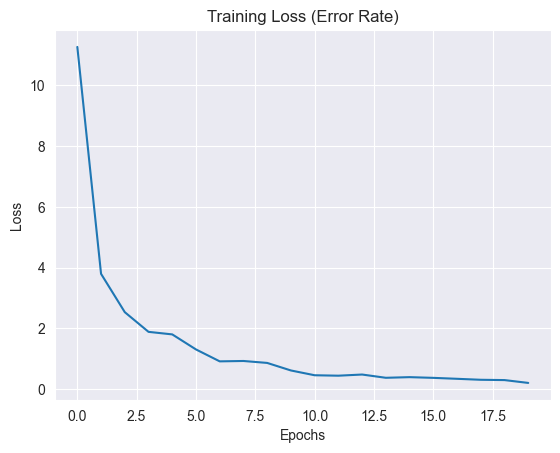

In [7]:
model = MLPClassifier(hidden_layer_sizes=(512,256), max_iter=20, verbose=True)
model.fit(X_train, y_train)  # Max iter means 20 passes through the training data

# Evaluate
y_pred = model.predict(X_test)
print("Multilayer Perceptron accuracy:", accuracy_score(y_test, y_pred))

plt.plot(model.loss_curve_)
plt.title('Training Loss (Error Rate)')
plt.xlabel('Epochs')  # Iterations through the data
plt.ylabel('Loss')
plt.show()

Predicted class: T-shirt/top


C:\Users\daniel.szelogowsk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


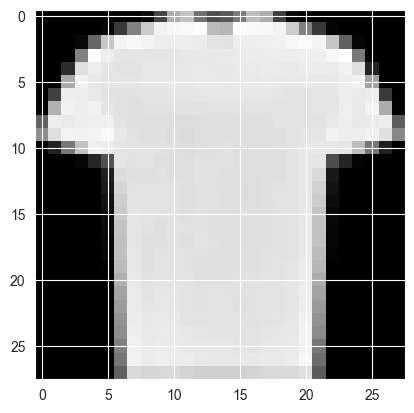

In [6]:
def predict_from_b64(b_str):
    img_data = base64.b64decode(b_str)
    
    # Preprocess image to match dataset
    img = Image.open(BytesIO(img_data)).convert('L')  # Grayscale
    img = ImageOps.invert(img)
    img = img.resize((28, 28))
    img_arr = np.array(img).reshape(-1) / 255.0  # Flatten and normalize
    return model.predict([img_arr])[0], img

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
b64_str = input("Input the base64 string of the image (bit.ly/b64encode): ")
prediction, image = predict_from_b64(b64_str)
print("Predicted class:", classes[prediction])

plt.imshow(image, cmap='gray')
plt.show()